# **Download Datasets**

In [24]:
!pip install gdown  # Ensure gdown is installed

In [25]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "13gTjGH-__ZKXNL_7uQ_GbGumC4PBIRJc"
output_file = "Actor_Datasets.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=13gTjGH-__ZKXNL_7uQ_GbGumC4PBIRJc
From (redirected): https://drive.google.com/uc?id=13gTjGH-__ZKXNL_7uQ_GbGumC4PBIRJc&confirm=t&uuid=de16bf90-9ece-4f2e-9135-389be8d6005a
To: /content/Actor_Datasets.zip
100%|██████████| 337M/337M [00:03<00:00, 103MB/s]


'Actor_Datasets.zip'

# **UnZip the file**

In [26]:
import zipfile
z= zipfile.ZipFile('/content/Actor_Datasets.zip')
z.extractall()

# **Import libraries**

In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from retinaface import RetinaFace
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# **Face Detection**

In [2]:
def detect_and_crop_face(image_path):
    """Detects a face in an image, crops it, and resizes it to 224x224."""
    image = Image.open(image_path)
    faces = RetinaFace.detect_faces(image_path)

    if len(faces) >= 2:
        print(f"Multiple faces detected in {image_path}, skipping...")
        return None
    elif len(faces) == 0:
        print(f"No face detected in {image_path}, skipping...")
        return None

    # print(faces)
    key = list(faces.keys())[0]
    face = faces[key]
    print(face)
    x1, y1, x2, y2 = face["facial_area"]

    # # Expand bounding box
    # expansion = 60
    # x1 = max(0, x1 - expansion)
    # y1 = max(0, y1 - expansion)
    # x2 = min(image.size[1], x2 + expansion)
    # y2 = min(image.size[0], y2 + expansion)

    # Crop and resize face
    face_crop = image.crop((x1, y1, x2, y2))
    face_resized = face_crop.resize((224, 224))

    return face_resized


{'score': 0.9994450211524963, 'facial_area': [198, 52, 341, 192], 'landmarks': {'right_eye': [232.55452, 115.52455], 'left_eye': [293.45724, 101.52324], 'nose': [267.12164, 134.16507], 'mouth_right': [251.34645, 160.47542], 'mouth_left': [302.29517, 149.06963]}}


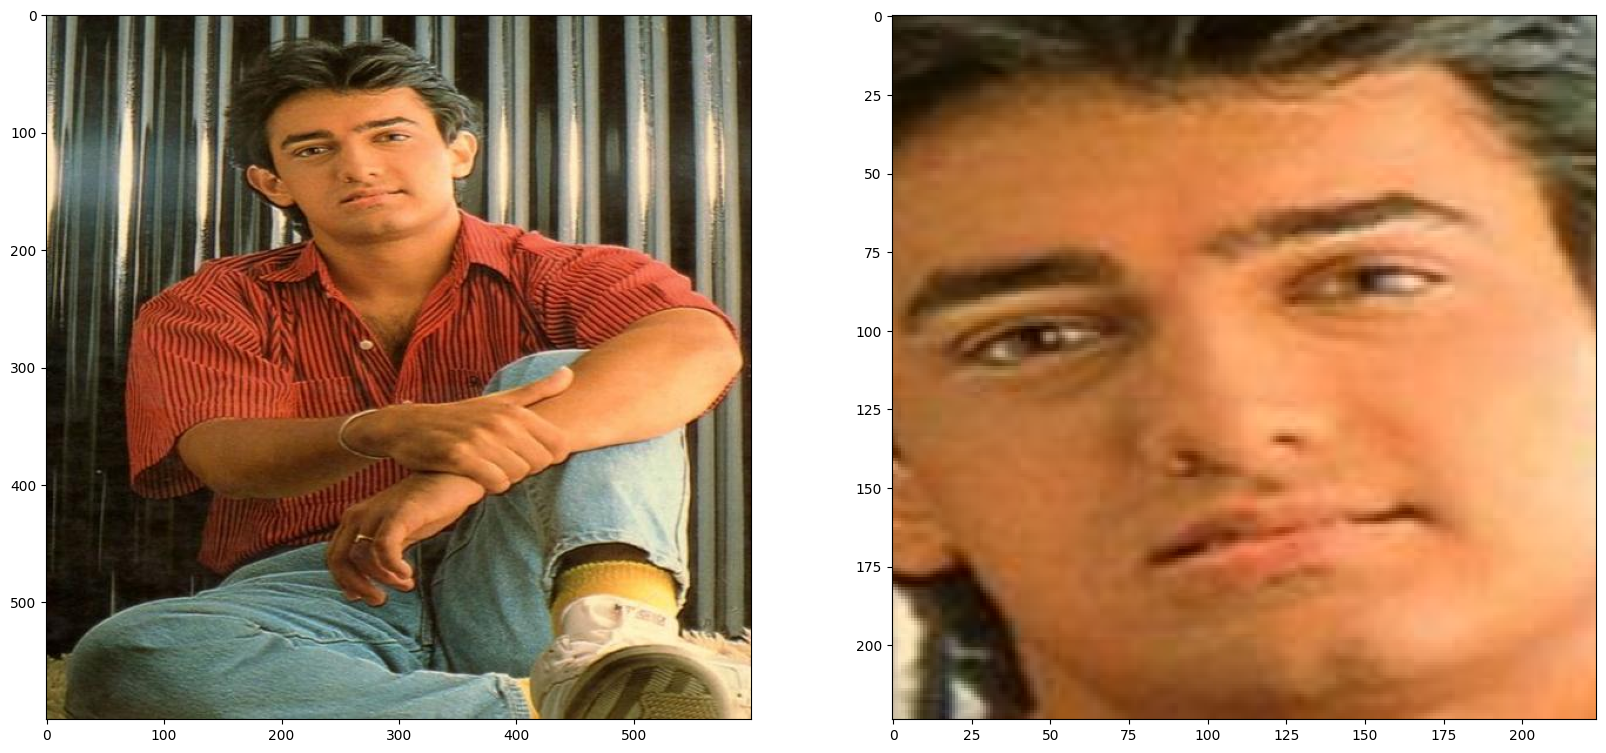

2149
2149


In [4]:
images_dir = "Actor_Datasets/train"
images_dir_actor = os.listdir(images_dir)

fig,axes = plt.subplots(1,2,figsize=(20,22))
axes = axes.ravel()

for i, filename in enumerate(images_dir_actor):
    image_path = os.path.join(images_dir, images_dir_actor[9])
    # image_path = os.path.join(images_dir, filename)
    img = Image.open(image_path)
    axes[0].imshow(img)
    processed_face = detect_and_crop_face(image_path)
    axes[1].imshow(processed_face)
    if processed_face is not None:
        processed_face.save(image_path)
    # else:
    #     os.remove(image_path)  # Remove invalid images
      
    break

plt.show()

print(len(images_dir_actor))
images_dir_actor = os.listdir(images_dir)
print(len(images_dir_actor))

# **Image details**

In [31]:
image_channel = 1
image_width = 224
image_height = 224
input_size = (image_width,image_height,image_channel)

# **Convert Datasets to pandas dataframe**

In [32]:
class FormData():
  def __init__(self,dir):
    self.dir = dir

  def dataframe_formation(self):
    filenames = os.listdir(self.dir)
    categories = []
    for i in range(len(filenames)):
        classes = filenames[i].split("_",1)[0] # amirkhan_0.jpg ==> [amirkhan, 0.jpg]
        categories.append(classes)
    df = pd.DataFrame({
        'Filename' : filenames,
        'class' : categories
    })
    return df

In [4]:
str = "amirkhan_0.jpg_jpg"
classes = str.split("_",2)
print(classes)

['amirkhan', '0.jpg', 'jpg']


In [33]:
train_dir = 'Actor_Datasets/train'
train_obj = FormData(train_dir)
training_df = train_obj.dataframe_formation()

In [34]:
print(training_df.head())
print(len(training_df))

               Filename        class
0     amirkhan_1033.jpg     amirkhan
1  sharukhkhan_1226.jpg  sharukhkhan
2    salmankhan_324.jpg   salmankhan
3  sharukhkhan_1221.jpg  sharukhkhan
4   salmankhan_1130.jpg   salmankhan
2069


# **Plot bar graph**

<Axes: xlabel='class'>

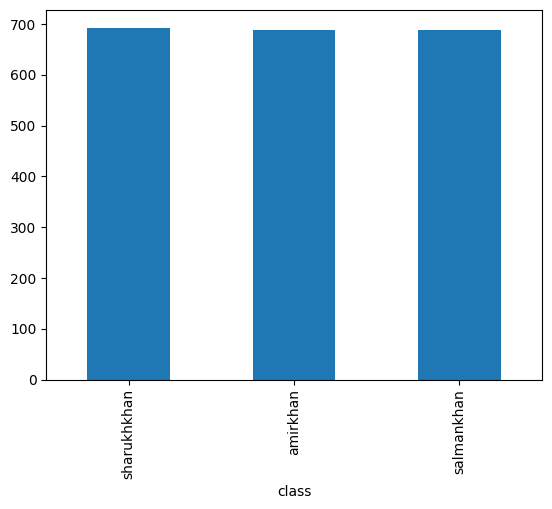

In [35]:
training_df['class'].value_counts().plot.bar()

# **Plot Images**

<class 'numpy.ndarray'>   (4, 4)
<class 'numpy.ndarray'>   (16,)


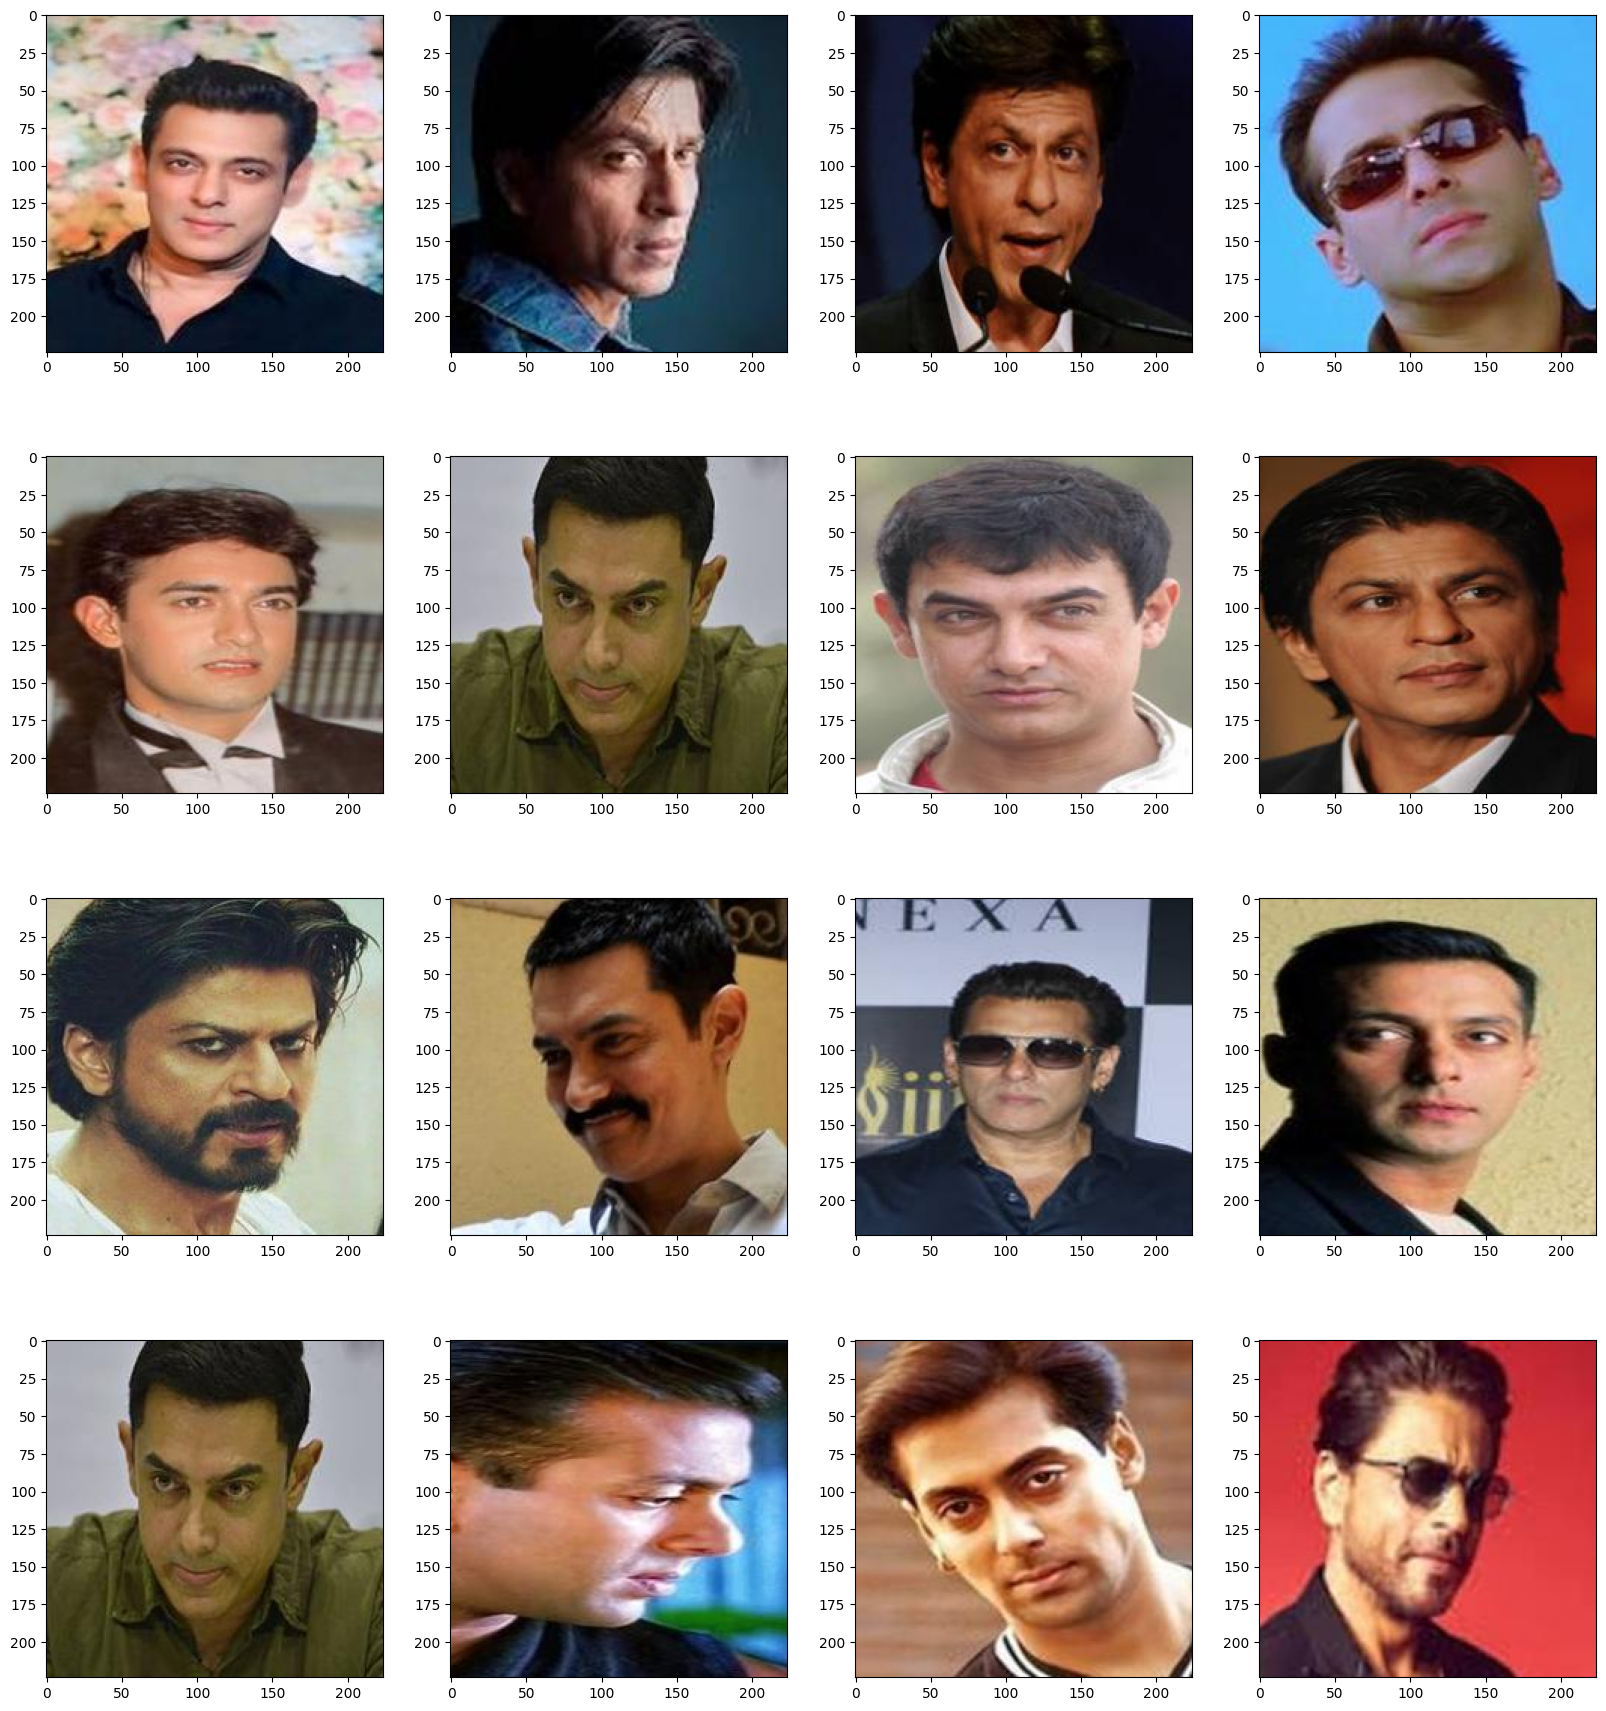

In [36]:
from PIL import Image

fig, axes = plt.subplots(4,4,figsize=(20,22))

print(type(axes),' ', axes.shape)

axes=axes.ravel()

print(type(axes),' ', axes.shape)

for i in range(16):
    sample_row = training_df.sample(n=1).iloc[0]  # Get the row as a Series randomly
    image_path = os.path.join(train_dir,sample_row['Filename'])
    image = Image.open(image_path)
    axes[i].set_title(sample_row['class'])
    axes[i].imshow(image)

# fig.suptitle("My Grid of Plots", fontsize=16)  # Adds a title for the entire figure

plt.show()

# **Split image datasets and reset index**

In [37]:
train_df,val_df = train_test_split(training_df,test_size=0.20,random_state=7)

train_df_len = len(train_df)
val_df_len = len(val_df)

print(train_df_len)
print(val_df_len)

print('Before....')
print(train_df.head())
print('\n',val_df.head())

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

print('\nAfter.....')
print(train_df.head())
print('\n',val_df.head())


1655
414
Before....
               Filename       class
471    amirkhan_110.jpg    amirkhan
1136  amirkhan_3030.jpg    amirkhan
1648  salmankhan_22.jpg  salmankhan
879    amirkhan_356.jpg    amirkhan
324     amirkhan_13.jpg    amirkhan

                   Filename        class
947    sharukhkhan_329.jpg  sharukhkhan
623    sharukhkhan_298.jpg  sharukhkhan
1268   sharukhkhan_358.jpg  sharukhkhan
1389  sharukhkhan_1243.jpg  sharukhkhan
501       amirkhan_568.jpg     amirkhan

After.....
            Filename       class
0   amirkhan_110.jpg    amirkhan
1  amirkhan_3030.jpg    amirkhan
2  salmankhan_22.jpg  salmankhan
3   amirkhan_356.jpg    amirkhan
4    amirkhan_13.jpg    amirkhan

                Filename        class
0   sharukhkhan_329.jpg  sharukhkhan
1   sharukhkhan_298.jpg  sharukhkhan
2   sharukhkhan_358.jpg  sharukhkhan
3  sharukhkhan_1243.jpg  sharukhkhan
4      amirkhan_568.jpg     amirkhan


# **Create the Traindata loader**

In [38]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255.0,         # Normalize pixel values to range [0,1]
    rotation_range=20,        # Randomly rotate images by ±20 degrees
    width_shift_range=0.2,    # Randomly shift images horizontally by 20% of width
    height_shift_range=0.2,   # Randomly shift images vertically by 20% of height
    shear_range=0.2,          # Apply shear transformations up to 20%
    zoom_range=0.2,           # Zoom images in/out by 20%
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill empty pixels using the nearest pixel values
)

traindata = train_datagen.flow_from_dataframe(
    train_df,
    train_dir,
    x_col = 'Filename',
    y_col = 'class',
    color_mode= "grayscale",
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = batch_size
)
print(len(traindata))

Found 1655 validated image filenames belonging to 3 classes.
52


# **Create the validdata loader**

In [39]:
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

valdata = val_datagen.flow_from_dataframe(
    val_df,
    train_dir,
    x_col = 'Filename',
    y_col = 'class',
    color_mode= "grayscale",
    target_size = (224,224),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 414 validated image filenames belonging to 3 classes.


# **Plot images after dataloader**

In [40]:
print(valdata.class_indices)

{'amirkhan': 0, 'salmankhan': 1, 'sharukhkhan': 2}


{'amirkhan': 0, 'salmankhan': 1, 'sharukhkhan': 2}
(32, 3)
(32, 224, 224, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


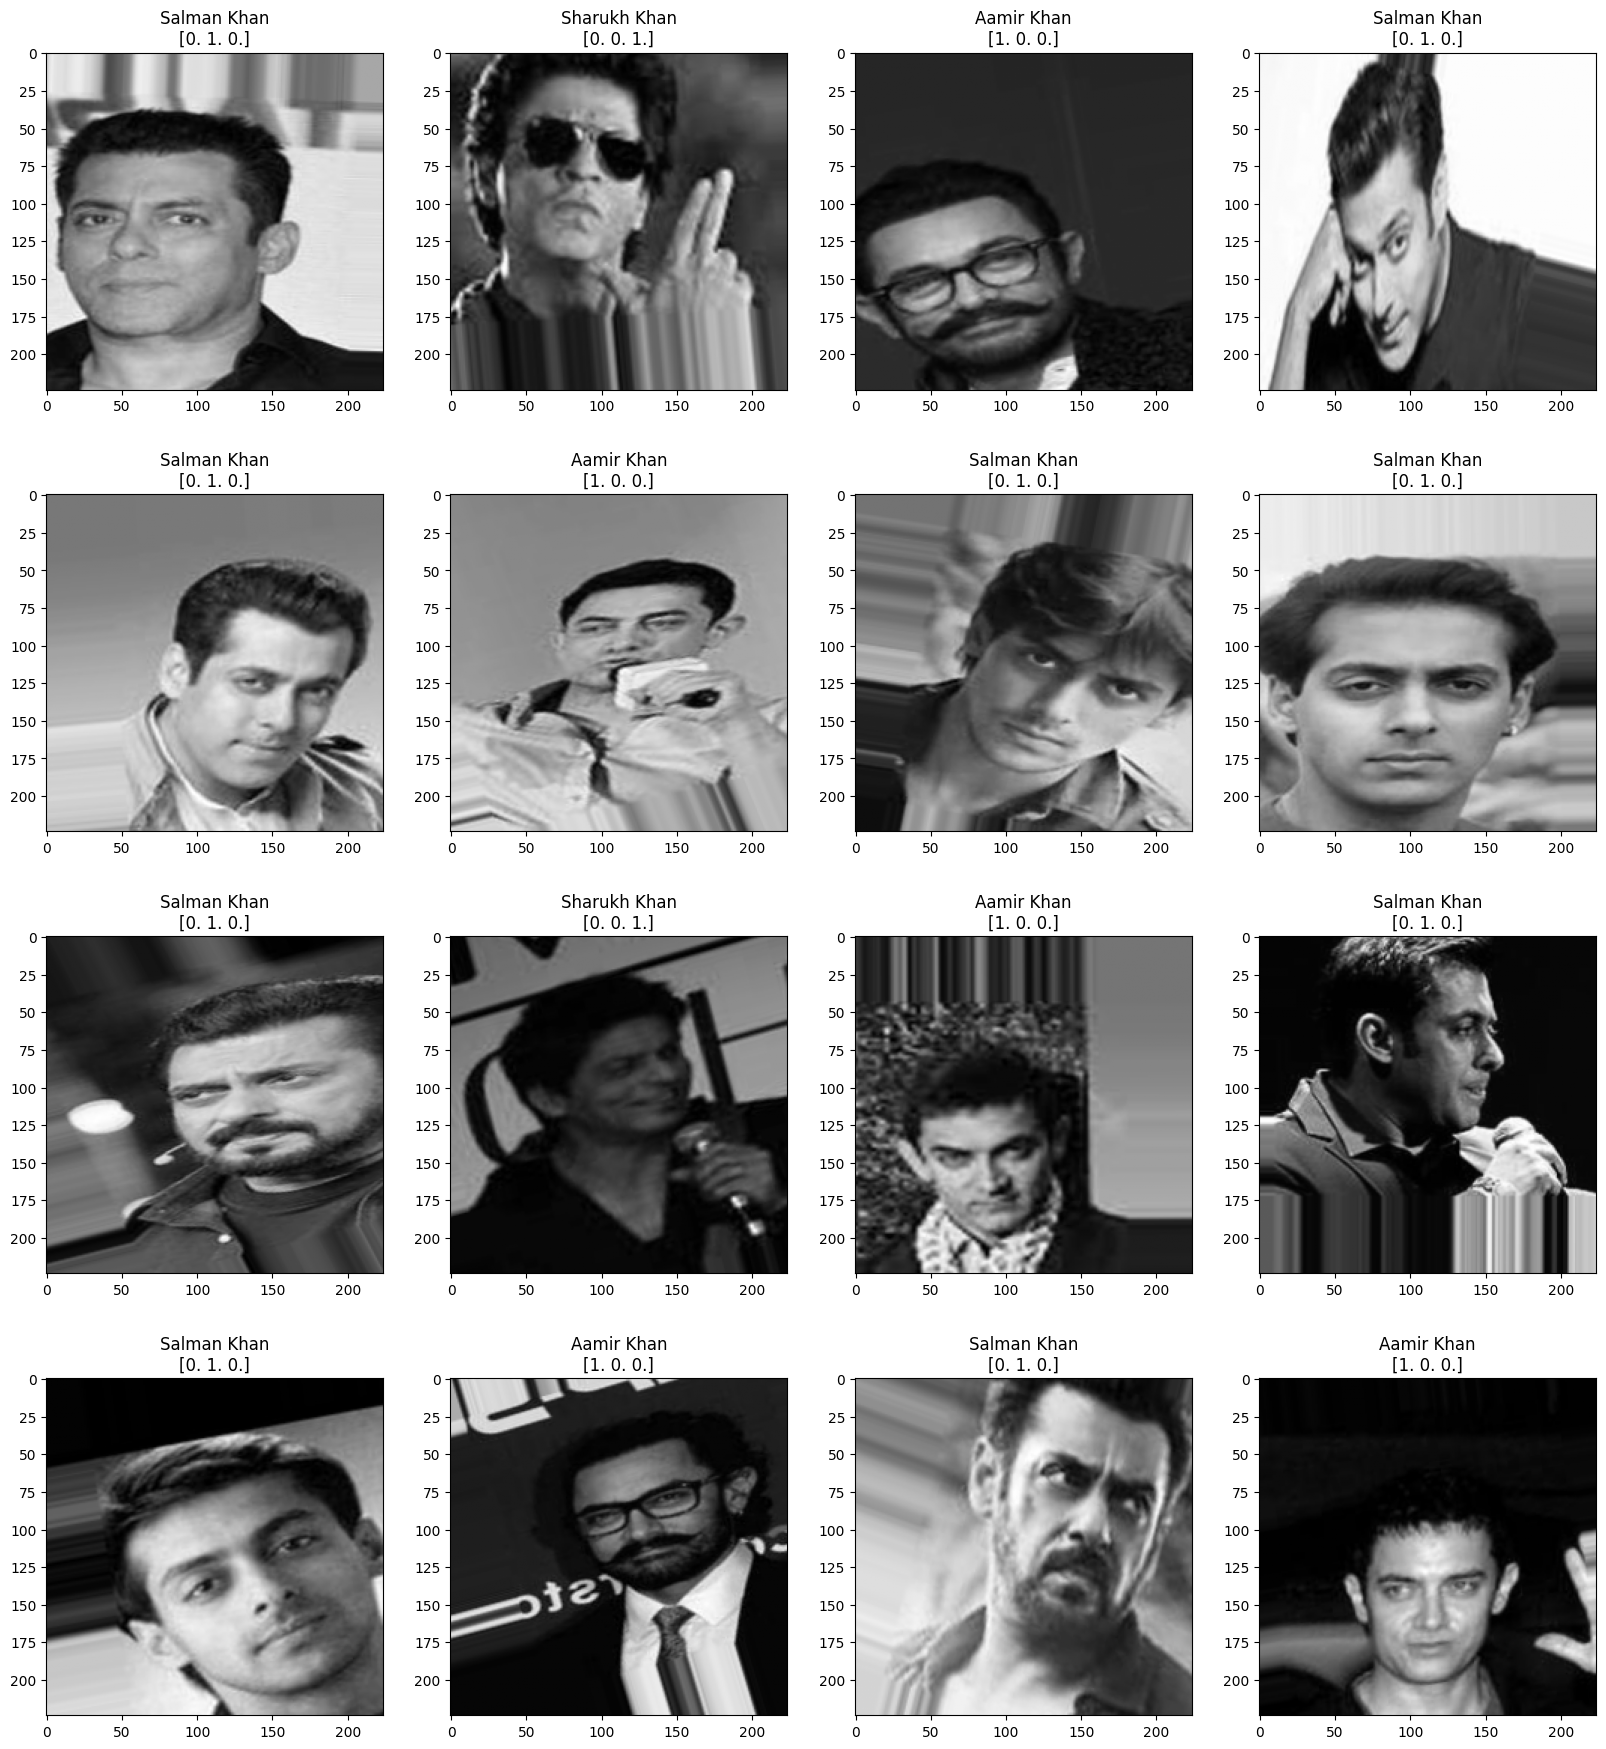

In [41]:
class_name = {0:'Aamir Khan', 1:'Salman Khan', 2:'Sharukh Khan'}

images,labels = next(traindata)

print(labels.shape)
print(images.shape)
print(type(labels))
print(type(images))

fig,axes = plt.subplots(4,4,figsize=(20,22))
axes = axes.ravel()

for i in range(16):
    axes[i].imshow(images[i],cmap='gray')
    index = np.argmax(labels[i])
    axes[i].set_title(f'{class_name[index]}\n{labels[i]}')

plt.show()

# **Create simple CNN model**

In [ ]:
# 1  2  3        0.9  0.7  1.5
# 4  5  6  ===>  2.2  3    3.8   
# 7  8  9        4.5  5.3  5.9

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_size))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

opt = Adam(learning_rate=0.0008)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      160       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 32)      128       
 chNormalization)                                                
                                                        

# **Create callbacks**


In [43]:
chceckpoint = ModelCheckpoint(filepath = 'Actor_classfication_model.keras',
                              monitor = 'val_loss',
                              mode = 'min',
                              save_best_only = True,
                              verbose = 1)

In [44]:
callbacks = [chceckpoint]

# **Training the model**

In [45]:
print(val_df_len / batch_size) ## 414 / 32
print(np.ceil(val_df_len / batch_size))
print(int(np.ceil(val_df_len / batch_size)))

12.9375
13.0
13


In [46]:
epochs = 100
history = model.fit(traindata,
                    epochs = epochs,
                    callbacks = callbacks,
                    validation_data = valdata,
                    validation_steps = int(np.ceil(val_df_len / batch_size)),
                    steps_per_epoch = int(np.ceil(train_df_len / batch_size)))

Epoch 1/100
52/52 [==============================] - ETA: 0s - loss: 1.2909 - accuracy: 0.4314
Epoch 1: val_loss improved from inf to 2.35309, saving model to Actor_classfication_model.keras
52/52 [==============================] - 21s 191ms/step - loss: 1.2909 - accuracy: 0.4314 - val_loss: 2.3531 - val_accuracy: 0.3430
Epoch 2/100
52/52 [==============================] - ETA: 0s - loss: 1.0591 - accuracy: 0.4967
Epoch 2: val_loss did not improve from 2.35309
52/52 [==============================] - 9s 167ms/step - loss: 1.0591 - accuracy: 0.4967 - val_loss: 2.4820 - val_accuracy: 0.2923
Epoch 3/100
52/52 [==============================] - ETA: 0s - loss: 1.0537 - accuracy: 0.4918
Epoch 3: val_loss improved from 2.35309 to 1.93481, saving model to Actor_classfication_model.keras
52/52 [==============================] - 8s 163ms/step - loss: 1.0537 - accuracy: 0.4918 - val_loss: 1.9348 - val_accuracy: 0.2923
Epoch 4/100
52/52 [==============================] - ETA: 0s - loss: 0.9686 - 

# **Plot the graphs**

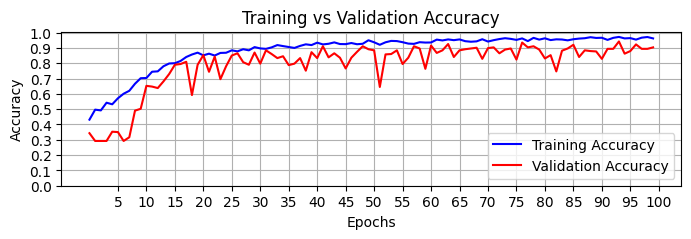

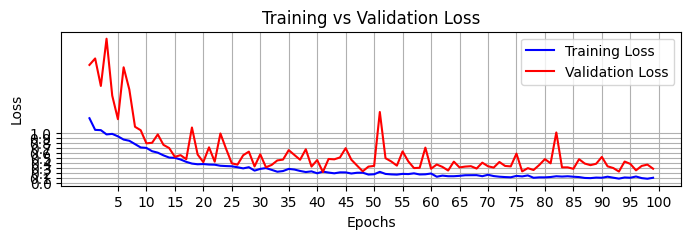

In [49]:
plt.figure(figsize=(8, 2))
plt.plot(history.history['accuracy'], label="Training Accuracy", color='b')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", color='r')
plt.xticks(np.arange(5, epochs + 1, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 2))
plt.plot(history.history['loss'], label="Training Loss", color='b')
plt.plot(history.history['val_loss'], label="Validation Loss", color='r')
plt.xticks(np.arange(5, epochs + 1, 5))
plt.yticks(np.arange(0, 2.1, 0.1))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# **Testing the images**

{'score': 0.996183454990387, 'facial_area': [291, 48, 327, 100], 'landmarks': {'right_eye': [302.09445, 61.685535], 'left_eye': [318.0984, 64.570915], 'nose': [308.1617, 75.04553], 'mouth_right': [300.79938, 85.45778], 'mouth_left': [312.41727, 87.90214]}}
1/1 [==============================] - 0s 348ms/step
{'score': 0.9995001554489136, 'facial_area': [127, 44, 443, 377], 'landmarks': {'right_eye': [192.64995, 216.7353], 'left_eye': [308.70718, 157.19171], 'nose': [268.48935, 256.08548], 'mouth_right': [268.71393, 323.5229], 'mouth_left': [363.0143, 272.99103]}}
1/1 [==============================] - 0s 19ms/step
{'score': 0.9994910955429077, 'facial_area': [239, 98, 376, 239], 'landmarks': {'right_eye': [273.71753, 155.25838], 'left_eye': [337.42755, 159.32906], 'nose': [302.57156, 190.30817], 'mouth_right': [276.0685, 206.12837], 'mouth_left': [327.659, 210.02751]}}
1/1 [==============================] - 0s 17ms/step
{'score': 0.9995001554489136, 'facial_area': [127, 44, 443, 377], 

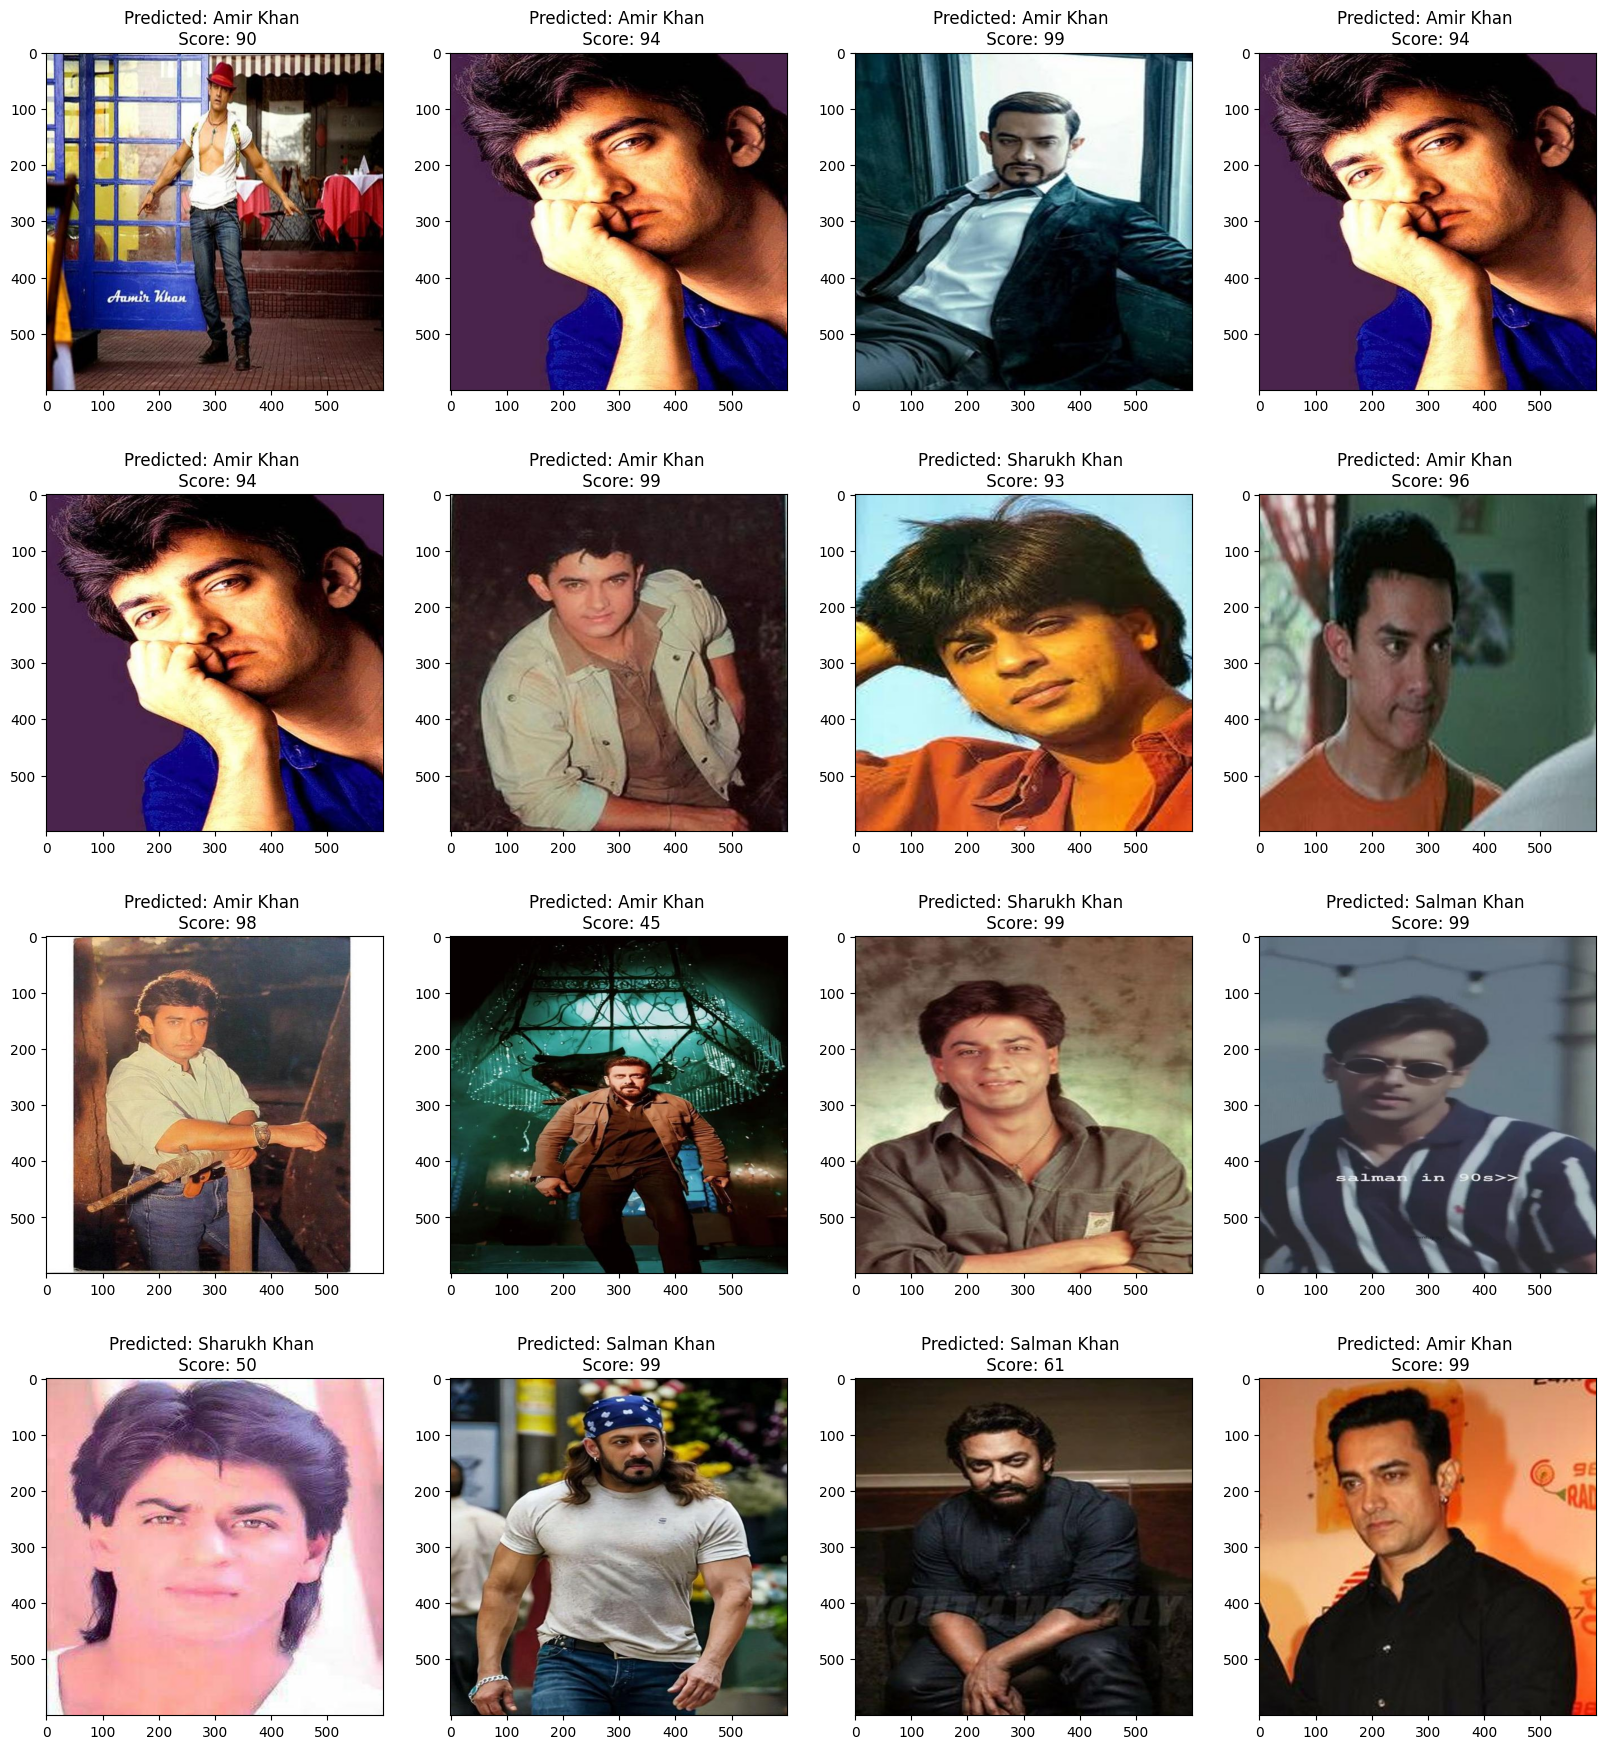

In [51]:
import tensorflow as tf

class_name = {0:'Amir Khan', 1:'Salman Khan', 2:'Sharukh Khan'}

test_dir = "Actor_Datasets/test"
test_dir_files = os.listdir(test_dir)

model =  tf.keras.models.load_model('Actor_classfication_model.keras')

fig,axes = plt.subplots(4,4,figsize=(20,22))
axes=axes.ravel()

i = 0
while i < 16:
  image_path = os.path.join(test_dir,random.choice(test_dir_files))
  preprocessed_image = detect_and_crop_face(image_path)

  if preprocessed_image is None:
    i -= 1
    continue

  preprocessed_image = ImageOps.grayscale(preprocessed_image)
  # Assuming preprocessed_image is your NumPy array
  img = np.expand_dims(preprocessed_image, axis=0)
  img = img / 255.0
  pred = model.predict(img)[0]
  index = np.argmax(pred, axis=-1)
  score = int(pred[index] * 100)
  image = Image.open(image_path)
  axes[i].imshow(image)
  axes[i].set_title(f'Predicted: {class_name[index]} \n Score: {score}')
  i += 1

plt.show()